## Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Load extracted feature data set

In [2]:
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = '2021-03-05 00:51:00.522684/'
feature_path = path + pred_save_path + "pca_compressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 400)


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,-1.493566,-0.032945,0.761247,0.851097,-0.371202,0.059588,-0.395461,0.548428,-0.020920,-0.091558,...,-0.158743,0.152201,-0.262729,0.357305,0.057175,-0.005967,0.368699,0.0,1,541.714286
-01-CON-D02-L.png,1.123871,-2.569318,-0.182813,0.112116,0.101463,0.100415,0.357726,-1.357289,0.868277,-1.016406,...,-0.141903,0.053999,-0.093881,-0.027528,-0.088447,0.004558,-0.109825,2.0,1,623.140496
-01-CON-D04-L.png,5.141856,-0.806582,1.384057,0.314984,-1.501614,0.372223,0.459426,0.627495,-1.434092,-0.344524,...,0.068768,-0.021809,0.177576,-0.050402,-0.197563,0.082842,-0.222215,4.0,1,635.671057
-01-CON-D07-L.png,3.996657,0.985590,0.851739,-0.762798,-3.900039,0.012290,2.134187,0.964457,-0.199844,-0.148262,...,0.153253,-0.122067,0.087640,-0.017017,0.080265,0.231282,0.316626,7.0,1,539.917695
-01-CON-D09-L.png,1.921335,-2.371459,-0.087540,0.538936,-0.881779,-0.043866,-1.345864,-0.694469,0.605521,-1.181089,...,0.152110,0.063145,0.030988,0.059152,-0.082571,0.079454,-0.126808,9.0,1,471.580368


In [5]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \
        wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/var/folders/qg/n_qkcysd0vxfsffsxdxmyqq80000gn/T/ipykernel_15971/405826525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \


In [6]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
#print(feature_data)

In [8]:
feature_data

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,-1.493566,-0.032945,0.761247,0.851097,-0.371202,0.059588,-0.395461,0.548428,-0.020920,-0.091558,...,0.152201,-0.262729,0.357305,0.057175,-0.005967,0.368699,0.0,1,541.714286,1.000000
-01-CON-D02-L.png,1.123871,-2.569318,-0.182813,0.112116,0.101463,0.100415,0.357726,-1.357289,0.868277,-1.016406,...,0.053999,-0.093881,-0.027528,-0.088447,0.004558,-0.109825,2.0,1,623.140496,1.150312
-01-CON-D04-L.png,5.141856,-0.806582,1.384057,0.314984,-1.501614,0.372223,0.459426,0.627495,-1.434092,-0.344524,...,-0.021809,0.177576,-0.050402,-0.197563,0.082842,-0.222215,4.0,1,635.671057,1.173443
-01-CON-D07-L.png,3.996657,0.985590,0.851739,-0.762798,-3.900039,0.012290,2.134187,0.964457,-0.199844,-0.148262,...,-0.122067,0.087640,-0.017017,0.080265,0.231282,0.316626,7.0,1,539.917695,0.996684
-01-CON-D09-L.png,1.921335,-2.371459,-0.087540,0.538936,-0.881779,-0.043866,-1.345864,-0.694469,0.605521,-1.181089,...,0.063145,0.030988,0.059152,-0.082571,0.079454,-0.126808,9.0,1,471.580368,0.870533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-2.777258,1.702572,-1.603724,1.611517,0.767368,-2.607815,0.293940,-0.999052,-1.007969,-0.598420,...,-0.227438,-0.060959,0.254676,0.177195,-0.027750,0.142886,16.0,10,72.664360,0.123377
rotate90-10-CON-D18-R.png,-2.472507,1.286532,-0.979662,2.287571,-0.593094,-1.596051,1.122693,-1.025815,-0.840343,0.500074,...,0.272841,0.134706,0.002416,0.003899,0.112062,0.309282,18.0,10,52.979729,0.089955
rotate90-10-CON-D21-R.png,-2.839765,-0.264517,-1.154689,0.875924,-0.543438,-1.569502,0.535455,-0.286528,-1.512204,0.168994,...,-0.248303,-0.030805,-0.244883,0.333227,0.186511,-0.208335,21.0,10,37.469388,0.063620
rotate90-10-CON-D23-R.png,-2.300177,-1.296264,-0.824807,-0.142944,-0.094049,0.108360,-0.149193,0.471214,-0.072524,0.707056,...,0.043609,-0.036956,0.092948,0.055180,-0.171486,-0.070429,23.0,10,93.339100,0.158481


## Read the clinical file for days until heal data

In [9]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/var/folders/qg/n_qkcysd0vxfsffsxdxmyqq80000gn/T/ipykernel_15971/1111790543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4


In [10]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  713.760000         1.000000   
-05-CON-D04-L.png            4.0          5  648.870392         0.909088   
-05-CON-D07-L.png            7.0          5  473.144531         0.662890   
-05-CON-D09-L.png            9.0          5  228.977778         0.320805   
-05-CON-D11-L.png           11.0          5  114.062222         0.159805   
-05-CON-D14-L.png           14.0          5   53.819444         0.075403   
-05-CON-D16-L.png           16.0          5   31.265306         0.043804   
-05-CON-D18-L.png           18.0          5   23.537778         0.032977   
-05-CON-D21-L.png           21.0          5    7.155455         0.010025   
-05-CON-D23-L.png           23.0          5    1.466049         0.002054   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    5.034722         0.007054   
-05-CON-D30-

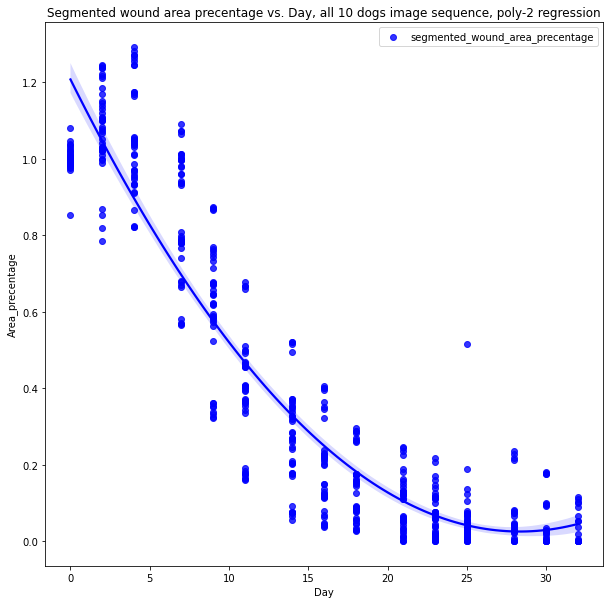

In [11]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

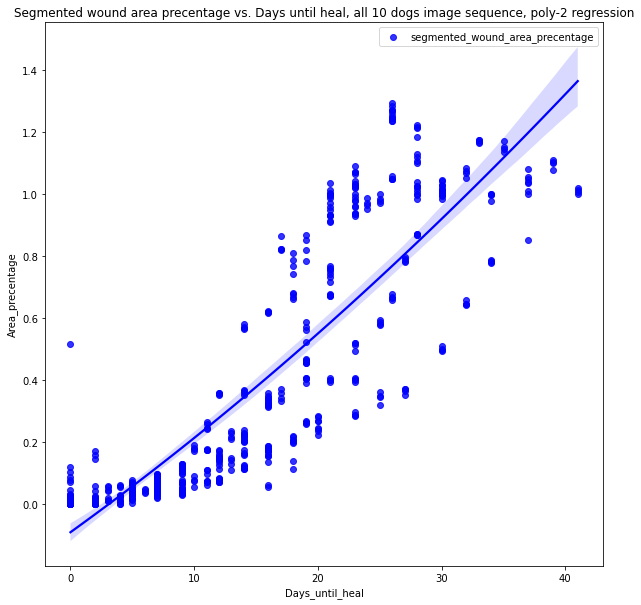

In [12]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [46]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9]


In [47]:
feature_data

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,-1.493566,-0.032945,0.761247,0.851097,-0.371202,0.059588,-0.395461,0.548428,-0.020920,-0.091558,...,0.152201,-0.262729,0.357305,0.057175,-0.005967,0.368699,0.0,1,541.714286,1.000000
-01-CON-D02-L.png,1.123871,-2.569318,-0.182813,0.112116,0.101463,0.100415,0.357726,-1.357289,0.868277,-1.016406,...,0.053999,-0.093881,-0.027528,-0.088447,0.004558,-0.109825,2.0,1,623.140496,1.150312
-01-CON-D04-L.png,5.141856,-0.806582,1.384057,0.314984,-1.501614,0.372223,0.459426,0.627495,-1.434092,-0.344524,...,-0.021809,0.177576,-0.050402,-0.197563,0.082842,-0.222215,4.0,1,635.671057,1.173443
-01-CON-D07-L.png,3.996657,0.985590,0.851739,-0.762798,-3.900039,0.012290,2.134187,0.964457,-0.199844,-0.148262,...,-0.122067,0.087640,-0.017017,0.080265,0.231282,0.316626,7.0,1,539.917695,0.996684
-01-CON-D09-L.png,1.921335,-2.371459,-0.087540,0.538936,-0.881779,-0.043866,-1.345864,-0.694469,0.605521,-1.181089,...,0.063145,0.030988,0.059152,-0.082571,0.079454,-0.126808,9.0,1,471.580368,0.870533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-2.777258,1.702572,-1.603724,1.611517,0.767368,-2.607815,0.293940,-0.999052,-1.007969,-0.598420,...,-0.227438,-0.060959,0.254676,0.177195,-0.027750,0.142886,16.0,10,72.664360,0.123377
rotate90-10-CON-D18-R.png,-2.472507,1.286532,-0.979662,2.287571,-0.593094,-1.596051,1.122693,-1.025815,-0.840343,0.500074,...,0.272841,0.134706,0.002416,0.003899,0.112062,0.309282,18.0,10,52.979729,0.089955
rotate90-10-CON-D21-R.png,-2.839765,-0.264517,-1.154689,0.875924,-0.543438,-1.569502,0.535455,-0.286528,-1.512204,0.168994,...,-0.248303,-0.030805,-0.244883,0.333227,0.186511,-0.208335,21.0,10,37.469388,0.063620
rotate90-10-CON-D23-R.png,-2.300177,-1.296264,-0.824807,-0.142944,-0.094049,0.108360,-0.149193,0.471214,-0.072524,0.707056,...,0.043609,-0.036956,0.092948,0.055180,-0.171486,-0.070429,23.0,10,93.339100,0.158481


In [48]:
wound_area_df

,Day,Dog_label,Area_mm2,Area_precentage,Days_until_heal
-01-CON-D00-L.png,0.0,1,541.714286,1.000000,37
-01-CON-D02-L.png,2.0,1,623.140496,1.150312,35
-01-CON-D04-L.png,4.0,1,635.671057,1.173443,33
-01-CON-D07-L.png,7.0,1,539.917695,0.996684,30
-01-CON-D09-L.png,9.0,1,471.580368,0.870533,28
...,...,...,...,...,...
rotate90-10-CON-D16-R.png,16.0,10,72.664360,0.123377,9
rotate90-10-CON-D18-R.png,18.0,10,52.979729,0.089955,7
rotate90-10-CON-D21-R.png,21.0,10,37.469388,0.063620,4
rotate90-10-CON-D23-R.png,23.0,10,93.339100,0.158481,2


### Part 1
Train the GPR on the 1-8 dog wound image sequence

In [55]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
#print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

print('X',X_test)
print(X_test.shape)
print('y',Y_test)
print(Y_test.shape)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 400)
X                                    0         1         2         3         4  \
-09-CON-D00-R.png           2.463005  0.493929 -1.297162 -1.356860 -2.496277   
-09-CON-D02-R.png           3.678500 -0.649980 -0.080574  0.848681 -1.897220   
-09-CON-D04-R.png           6.317431  1.585832 -0.450252 -1.500970 -3.274560   
-09-CON-D07-R.png           2.484310  1.358706 -1.164005 -3.900095 -3.038286   
-09-CON-D09-R.png           1.998996  1.317644 -1.169616 -3.642749 -3.269889   
-09-CON-D11-R.png           0.436949  1.191351 -3.029526 -4.361030 -0.402783   
-09-CON-D14-R.png           0.019639  8.101310  0.739588 -2.578702  1.474223   
-09-CON-D16-R.png          -1.608211  3.772674 -1.261060 -2.396585  2.581122   
-09-CON-D18-R.png          -2.681058  2.306483 -1.497975 -0.801269  1.359390   
-09-CON-D21-R.png          -1.352434 -0.245814 -2.678262 -2.112126  1.543428   
-09-CON-D23-R.png          -3.060358  0.191131 -1.095102 -0.456698  1.099

### Part 2
Train the GPR on all dog wound image sequences' (1 - 10) day 1-15 sequences.
Predict all all dog wound image sequences' (1 - 10) day 16-32 sequences.

In [56]:
# 2. use the < 16 days image sequence as training input and > 16 days image sequence as test input
# Train
#X_train = feature_data[feature_data['Day'].isin(range(0,16))]
#X_train = X_train.drop(['Dog_label','Area_mm2'], axis = 1)

#X_test = feature_data[feature_data['Day'].isin(range(16,35))]
#X_test = X_test[X_test['Dog_label'].isin([test_num])]

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
#X_test = X_test.drop(['Dog_label','Area_mm2'], axis = 1)
# Label
#Y_train = wound_area_df[wound_area_df['Day'].isin(range(0,16))]
#Y_train = Y_train['Area_precentage']

#Y_test = wound_area_df[wound_area_df['Day'].isin(range(16, 35))]
#Y_test = Y_test[Y_test['Dog_label'].isin([test_num])]

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
#Y_test = Y_test['Area_precentage']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 or 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
#print("The test wound image sequence's days:\n", days_seq)

## Linear Regression
Define the LinearRegression object.

### Grid search for Linear regressor

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Kernel with parameters given in GPML book
#k1 = ConstantKernel(constant_value=66.0**2) * RBF(length_scale=67.0)  # long term smooth rising trend
#k2 = ConstantKernel(constant_value=2.4**2) * RBF(length_scale=90.0) \
#    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
#k3 = ConstantKernel(constant_value=0.66**2) \
#    * RationalQuadratic(length_scale=1.2, alpha=0.78)
#k4 = ConstantKernel(constant_value=0.18**2) * RBF(length_scale=0.134) \
#    + WhiteKernel(noise_level=0.19**2)  # noise terms
#kernel_gpml = k1 + k2 + k3 + k4
#gp = GaussianProcessRegressor(kernel=kernel_gpml)

#param_grid = {'alpha': np.logspace(-2, 4, 5),
#              'kernel__k1__k1__k1__k1__constant_value': np.logspace(-2, 4, 5),
#              'kernel__k1__k1__k1__k2__length_scale': np.logspace(-2, 2, 5),
#              'kernel__k2__k2__noise_level':np.logspace(-2, 1, 5)
#              }


param_grid = [
    {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
]
gp = LinearRegression()

# print parameters
print(gp.get_params())

# scores for regression
#
#Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
#'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 
#'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 
#'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 
#'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
#'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
#'roc_auc', 'v_measure_score']

grid_gp = GridSearchCV(estimator = gp, cv=num_cv, param_grid=param_grid, n_jobs=-1, scoring = 'r2', verbose=10)
grid_gp.fit(X_train, Y_train)

print(grid_gp.best_params_)
gp = grid_gp.best_estimator_

print("The CV results are: ", grid_gp.best_score_)

# Make the prediction on test set.
Y_pred = gp.predict(X_test)
#print(Y_pred)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/aravind/Desktop/tensorflow-env/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/aravind/Desktop/tensorflow-env/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

/Users/aravind/Desktop/tensorflow-env/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/aravind/Desktop/tensorflow-env/env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
The CV results are:  -0.7549875232875181


In [58]:
#print("coefficients of training data points (features) in kernel space\n", gp.alpha_)

In [59]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
rotate180-09-CON-D04-R.png     4.0
rotate180-09-CON-D07-R.png     7.0
rotate180-09-CON-D09-R.png     9.0
rotate180-09-CON-D11-R.png    11.0
rotate180-09-CON-D14-R.png    14.0
rotate180-09-CON-D16-R.png    16.0
rotate180-09-CON-D18-R.png    18.0
rotate180-09-CON-D21-R.png    21.0
rotate180-09-CON-D23-R.png    23.0
rotate180-09-CON-D25-R.png    25.0
rotate180-09-CON-D28-R.png    28.0
rotate180-09-CON-D30-R.png    30.0
Name: Day, dtype: float64
Test set results are:  -5.476936341627505
[CV 2/5; 1/8] START copy_X=True, fit_intercept=True, normalize=True.............
[CV 2/5; 1/8] END copy_X=True, fit_intercept=True, normalize=True;, score=-0.746 total time=   0.0s
[CV 2/5; 3/8] START copy_X=True, fit_intercept=False, normalize=True............
[CV 2/5; 3/8] END copy_X=True, fit_intercept=False, normalize=True;, score=-0.653 total time=   0.0s
[CV 3/5; 4/8] START copy_X=True, fit_intercept=False, normalize=False..........

### Part 1 plots
connected line and poly-2 regression line

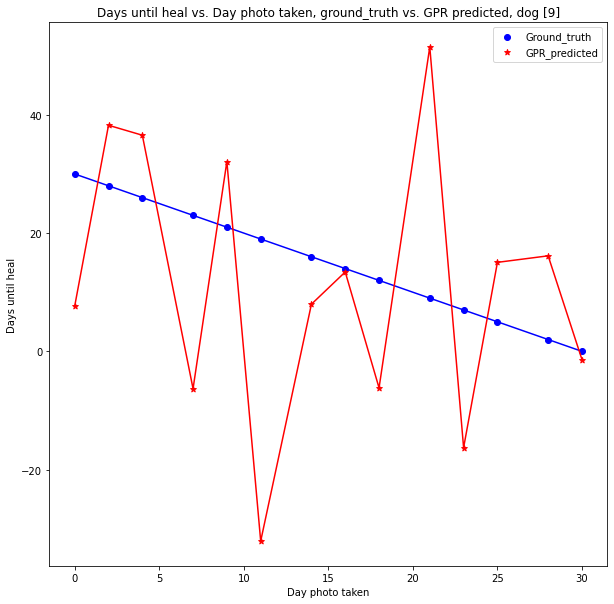

In [35]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = days_seq[14:28] , y = Y_test[14:28], color = 'blue', marker = 'o', label = "Ground_truth")
plt.plot(days_seq[14:28] , Y_test[14:28], linestyle='solid',color='blue')#, label='Ground_truth')

plt.scatter(x = days_seq[14:28] , y = Y_pred[14:28], color = 'red', marker = '*', label = "GPR_predicted")
plt.plot(days_seq[14:28] , Y_pred[14:28], linestyle='solid',color='red')#, label='GPR_predicted')

plt.title("Days until heal vs. Day photo taken, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Day photo taken")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted,dog {},days until heal,connected_lines, 180rotation_images.png".format(test_num))

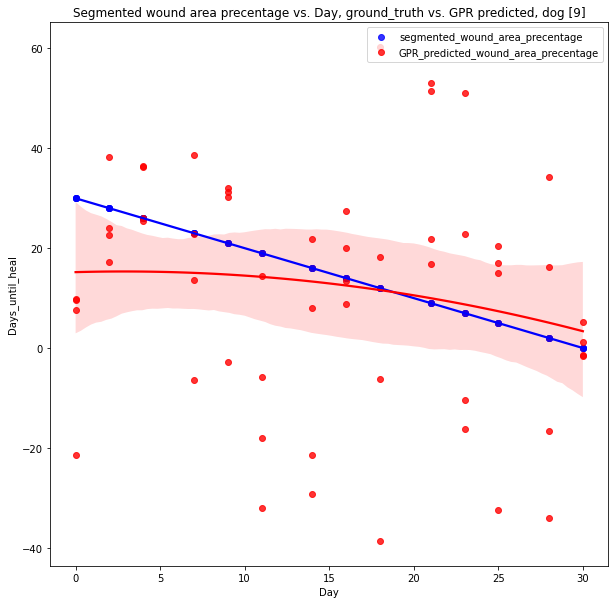

In [17]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=days_seq , y=Y_test, order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=days_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_wound_area_precentage', ax=ax)

ax.set(title='Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

#fig.savefig(fig_path + "ground_truth vs. GPR predicted, dog {}, poly2_regression.png".format(test_num))

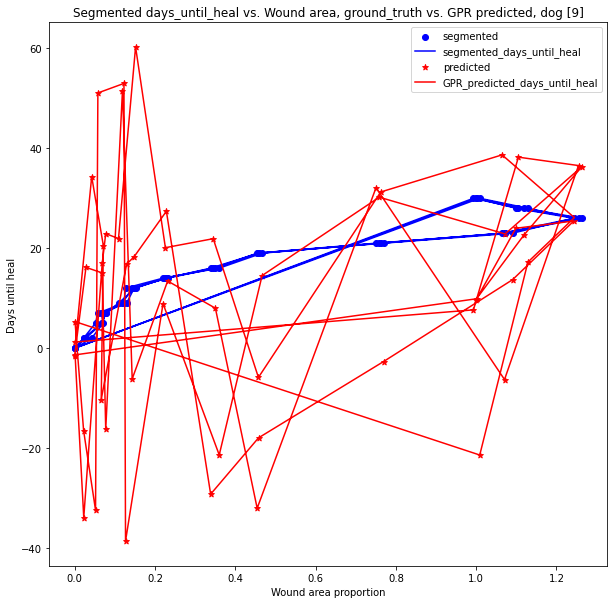

In [18]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = Area_prop_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
plt.plot(Area_prop_seq , Y_test, linestyle='solid',color='blue', label='segmented_days_until_heal')

plt.scatter(x = Area_prop_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
plt.plot(Area_prop_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_days_until_heal')

plt.title("Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Wound area proportion")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, connected_lines.png".format(test_num))

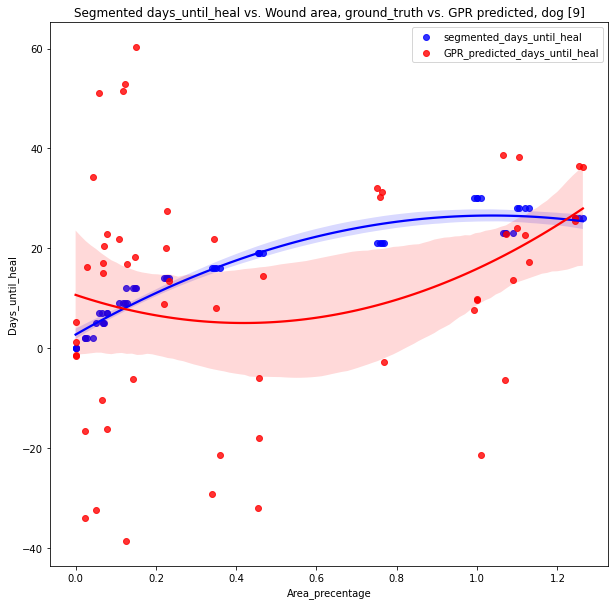

In [19]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=Area_prop_seq , y=Y_test, order = 2,
            color='blue', label='segmented_days_until_heal', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=Area_prop_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_days_until_heal', ax=ax)

ax.set(title='Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, poly2_regression.png".format(test_num))

### Part 2 plots
connected line and poly-2 regression line

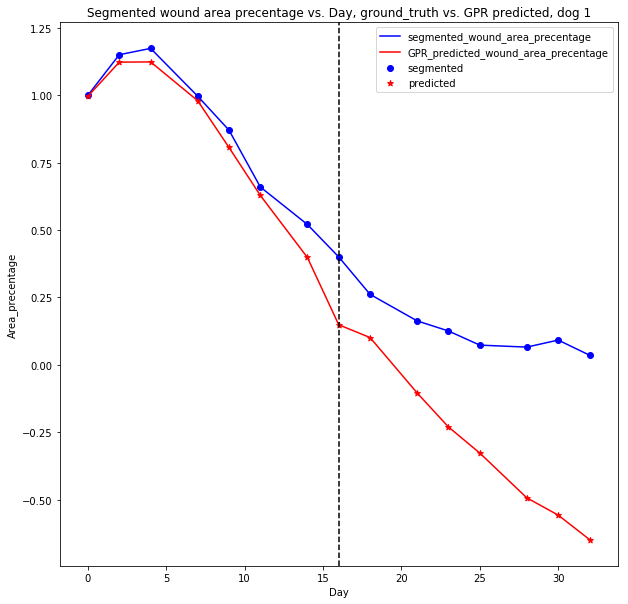

In [90]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

#fig, ax = plt.subplots(figsize=(10,10))

#plt.scatter(x = days_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
#plt.plot(days_seq , Y_test, linestyle='solid',color='blue', label='segmented_wound_area_precentage')

#plt.scatter(x = days_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
#plt.plot(days_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_wound_area_precentage')

#plt.axvline(x = 16, linestyle = '--', c = 'black')

#plt.title("Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}".format(test_num))
#plt.xlabel("Day")
#plt.ylabel("Area_precentage")
#ax.legend(loc='upper right')
#plt.show()

#fig.tight_layout()
#fig.savefig(fig_path + "(Train on < 16 days' all wound sequences)ground_truth vs. GPR predicted, dog {}, connected_lines.png".format(test_num))